In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#모든 시트지를 하나로 통합한 data 불러오기
df_1 = pd.read_excel('11번가_통합data.xlsx')
df_2 = pd.read_excel('네이버_통합data.xlsx') 

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자사주문번호   1548 non-null   int64 
 1   거래처      1548 non-null   object
 2   주문일      1548 non-null   int64 
 3   사은품여부    1548 non-null   object
 4   출고예정일    1548 non-null   int64 
 5   주문/배송상태  1548 non-null   object
 6   클레임 상태   1548 non-null   object
 7   운송장등록일자  1517 non-null   object
 8   상품순번     1548 non-null   object
 9   상품명      1548 non-null   object
 10  상품수량     1548 non-null   int64 
 11  덤상품수량    1548 non-null   int64 
 12  상품유형     1548 non-null   object
 13  상품타입     1548 non-null   object
 14  매출액      1548 non-null   int64 
 15  자재명      1548 non-null   object
 16  초기자재수량   1548 non-null   int64 
 17  주문수량     1548 non-null   int64 
 18  취소수량     1548 non-null   int64 
 19  반품수량     1548 non-null   int64 
 20  배송유형     1548 non-null   object
 21  마감구분     1548 non-null   object
dtype

In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152458 entries, 0 to 152457
Data columns (total 22 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   자사주문번호   152458 non-null  int64 
 1   거래처      152458 non-null  object
 2   주문일      152458 non-null  int64 
 3   사은품여부    152458 non-null  object
 4   출고예정일    152458 non-null  int64 
 5   주문/배송상태  152458 non-null  object
 6   클레임 상태   152458 non-null  object
 7   운송장등록일자  148147 non-null  object
 8   상품순번     152458 non-null  int64 
 9   상품명      152458 non-null  object
 10  상품수량     152458 non-null  int64 
 11  덤상품수량    152458 non-null  int64 
 12  상품유형     151753 non-null  object
 13  상품타입     151753 non-null  object
 14  매출액      152458 non-null  int64 
 15  자재명      151753 non-null  object
 16  초기자재수량   152458 non-null  int64 
 17  주문수량     152458 non-null  int64 
 18  취소수량     152458 non-null  int64 
 19  반품수량     152458 non-null  int64 
 20  배송유형     152458 non-null  object
 21  마감구분     1

In [10]:
#간단한 value_count
df_1_columns=list(df_1.columns)
for column in df_1_columns:
    print(df_1[column].value_counts())

40787430526414688    14
40787430511145463    11
40787430502983361    10
40787430504023065     9
40787430503996794     9
                     ..
40787430515220675     1
40787430511161511     1
40787430511161501     1
40787430511160092     1
40787430507056304     1
Name: 자사주문번호, Length: 619, dtype: int64
외부몰_직거래_11번가(신)    1548
Name: 거래처, dtype: int64
20230511    249
20230501     90
20230515     72
20230508     71
20230512     65
20230516     63
20230524     59
20230509     58
20230504     54
20230502     51
20230517     49
20230514     46
20230518     46
20230503     45
20230522     43
20230529     42
20230528     41
20230510     39
20230523     39
20230505     38
20230507     38
20230525     37
20230513     34
20230530     30
20230519     29
20230531     27
20230521     26
20230506     21
20230527     17
20230520     15
20230526     14
Name: 주문일, dtype: int64
N    1548
Name: 사은품여부, dtype: int64
20230514    276
20230507    163
20230530    161
20230510     74
20230512     69
20230521    

In [11]:
#간단한 value_count
df_2_columns=list(df_2.columns)
for column in df_2_columns:
    print(df_2[column].value_counts())

43262630515214227    36
43262630517261098    32
43262630528434349    26
43262630503015533    25
43262630508077341    24
                     ..
43262630520309982     1
43262630520309983     1
43262630520309984     1
43262630520309985     1
43262630528427532     1
Name: 자사주문번호, Length: 108987, dtype: int64
외부몰_직거래_네이버(신)    152458
Name: 거래처, dtype: int64
20230517    14791
20230529    12528
20230530     8250
20230523     6229
20230531     5564
20230510     5445
20230525     5080
20230508     5080
20230502     5077
20230501     5012
20230509     4982
20230516     4902
20230522     4891
20230515     4868
20230514     4860
20230518     4681
20230524     4561
20230503     4296
20230511     4291
20230521     3818
20230507     3709
20230512     3632
20230528     3480
20230519     3280
20230526     3131
20230504     2912
20230506     2788
20230505     2672
20230513     2609
20230527     2520
20230520     2519
Name: 주문일, dtype: int64
N    150171
Y      2287
Name: 사은품여부, dtype: int64
20230530    

In [84]:
#11번가, 네이버의 모든 데이터를 하나로 합침
df = pd.concat([df_1, df_2], axis = 0)

In [64]:
df.info()
#추가로 늘어난 컬럼이 없는것을 보아 잘 합쳐짐을 알수있음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154006 entries, 0 to 152457
Data columns (total 22 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   자사주문번호   154006 non-null  int64 
 1   거래처      154006 non-null  object
 2   주문일      154006 non-null  int64 
 3   사은품여부    154006 non-null  object
 4   출고예정일    154006 non-null  int64 
 5   주문/배송상태  154006 non-null  object
 6   클레임 상태   154006 non-null  object
 7   운송장등록일자  149664 non-null  object
 8   상품순번     154006 non-null  object
 9   상품명      154006 non-null  object
 10  상품수량     154006 non-null  int64 
 11  덤상품수량    154006 non-null  int64 
 12  상품유형     153301 non-null  object
 13  상품타입     153301 non-null  object
 14  매출액      154006 non-null  int64 
 15  자재명      153301 non-null  object
 16  초기자재수량   154006 non-null  int64 
 17  주문수량     154006 non-null  int64 
 18  취소수량     154006 non-null  int64 
 19  반품수량     154006 non-null  int64 
 20  배송유형     154006 non-null  object
 21  마감구분     1

In [22]:
#결측값이 있는지 확인하기
df.isna().sum()
#운송장등록일자, 상품유형,상품타입,자재명을 제외하고는 결측값이 없음

자사주문번호        0
거래처           0
주문일           0
사은품여부         0
출고예정일         0
주문/배송상태       0
클레임 상태        0
운송장등록일자    4342
상품순번          0
상품명           0
상품수량          0
덤상품수량         0
상품유형        705
상품타입        705
매출액           0
자재명         705
초기자재수량        0
주문수량          0
취소수량          0
반품수량          0
배송유형          0
마감구분          0
dtype: int64

In [44]:
#우선 운송장등록일자에 결측치가 있는경우를 살펴봄
df_test=df[df['운송장등록일자'].isna()==True]
df_test_columns=list(df_test.columns)
for column in df_test_columns:
    print(df_test[column].value_counts())
#주문이 취소된 경우에는 운송장이 등록되지 않기에 결측값이 존재한다는 것을 알수있었다

43262630516244417    13
43262630517251762    12
43262630530460938    11
43262630511153337    11
43262630515206498    10
                     ..
43262630507054888     1
43262630507054864     1
43262630507053345     1
43262630507053339     1
43262630516248585     1
Name: 자사주문번호, Length: 2966, dtype: int64
외부몰_직거래_네이버(신)     4311
외부몰_직거래_11번가(신)      31
Name: 거래처, dtype: int64
20230517    382
20230529    238
20230525    238
20230523    222
20230514    195
20230530    187
20230515    177
20230510    162
20230512    150
20230522    147
20230508    141
20230516    138
20230511    138
20230513    130
20230526    129
20230531    129
20230509    128
20230503    128
20230518    121
20230524    117
20230501    116
20230528    101
20230502    101
20230507     98
20230505     95
20230527     85
20230519     83
20230504     77
20230520     65
20230506     64
20230521     60
Name: 주문일, dtype: int64
N    4263
Y      79
Name: 사은품여부, dtype: int64
20230530    568
20230518    319
20230516    276
20230525 

In [45]:
#다음은 상품유형에 결측값이 있는경우를 살펴봄
df_test=df[df['상품유형'].isna()==True]
df_test_columns=list(df_test.columns)
for column in df_test_columns:
    print(df_test[column].value_counts())
#상품유형이 결측값이면 상품타입도 결측값임을 확인
#상품유형은 보통 묶음,복합,단일중 하나이며 상품타입은 일반이다.
#또한 상품명을 확인하면 전부 사은품에 해당하는 것을 알수있다. 
#따라서 분석에는 큰 영향이 없다고 판단한다

43262630507055694    2
43262630517273246    2
43262630511149814    2
43262630501966145    2
43262630516250695    2
                    ..
43262630517260843    1
43262630517260820    1
43262630517260798    1
43262630517260757    1
43262630528427618    1
Name: 자사주문번호, Length: 689, dtype: int64
외부몰_직거래_네이버(신)    705
Name: 거래처, dtype: int64
20230517    102
20230530     94
20230526     93
20230529     45
20230531     34
20230523     23
20230511     22
20230527     21
20230518     20
20230528     20
20230510     20
20230508     19
20230519     18
20230524     18
20230509     15
20230507     15
20230516     14
20230522     12
20230525     12
20230521     11
20230512     11
20230501      9
20230506      9
20230513      8
20230515      7
20230502      7
20230520      6
20230503      6
20230505      5
20230504      5
20230514      4
Name: 주문일, dtype: int64
Y    705
Name: 사은품여부, dtype: int64
20230530    163
20230518     84
20230601     73
20230531     56
20230519     35
20230525     31
20230521  

### 시각화1 : 랜덤박스 가격설정

In [65]:
df

,자사주문번호,거래처,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품명,...,상품유형,상품타입,매출액,자재명,초기자재수량,주문수량,취소수량,반품수량,배송유형,마감구분
0,40787430508088827,외부몰_직거래_11번가(신),20230506,N,20230510,배송 완료,-,2023-05-09 06:03:23,11,비비고/총각김치2.3KG,...,단일 상품,일반,26900,비비고/총각김치2.3KG(6입)_PGGNH/냉장,1,1,0,0,택배배송,냉장
1,40787430508088827,외부몰_직거래_11번가(신),20230506,N,20230510,배송 완료,-,2023-05-09 06:03:23,21,비비고 포기배추김치 더풍부한맛 3.3kg,...,단일 상품,일반,33800,비비고/포기배추더풍부한맛3.3KG(2입)/냉장,1,1,0,0,택배배송,냉장
2,40787430508088820,외부몰_직거래_11번가(신),20230506,N,20230510,배송 완료,-,2023-05-09 06:03:23,11,비비고/열무를 넣은 총각김치 1.3Kg,...,단일 상품,일반,14900,비비고/열무를 넣은 총각김치 1.3KG/냉장,1,1,0,0,택배배송,냉장
3,40787430508088820,외부몰_직거래_11번가(신),20230506,N,20230510,배송 완료,-,2023-05-09 06:03:23,21,[공용_마켓전략]비비고 묵은지 1.5kg,...,단일 상품,일반,16900,비비고/묵은지 1.5KG(4입)/냉장,1,1,0,0,택배배송,냉장
4,40787430506052632,외부몰_직거래_11번가(신),20230506,N,20230508,배송 완료,-,2023-05-07 06:12:05,11,삼호 얇은포 부산어묵 1kg,...,단일 상품,일반,35120,B)삼호/얇은포 부산어묵 1KG/냉동,4,4,0,0,택배배송,냉동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152453,43262630528427534,외부몰_직거래_네이버(신),20230528,N,20230530,배송 완료,-,2023-05-28 06:18:03,1,햇반솥반 전 제품(8종) 체험팩,...,복합 상품,일반,3841,솥반 불고기버섯영양밥 200G/상온,1,1,0,0,택배배송,상온
152454,43262630528427534,외부몰_직거래_네이버(신),20230528,N,20230530,배송 완료,-,2023-05-28 06:18:03,2,햇반 210G 6개,...,단일 상품,일반,11460,햇반210g*6EA,2,2,0,0,택배배송,상온
152455,43262630528427533,외부몰_직거래_네이버(신),20230528,N,20230529,배송 완료,-,2023-05-28 14:30:01,1,비비고 차돌된장찌개 460Gx5개,...,묶음 상품,일반,21510,비비고/차돌된장찌개 460G_18입/상온,5,5,0,0,네이버위탁,풀필먼트(상온)
152456,43262630528427533,외부몰_직거래_네이버(신),20230528,N,20230529,배송 완료,-,2023-05-28 14:30:01,2,비비고 돼지고기김치찌개 460Gx5개,...,묶음 상품,일반,21800,비비고/돼지고기김치찌개 460G_18입/상온,5,5,0,0,네이버위탁,풀필먼트(상온)


In [85]:
df.dropna(inplace = True)
df = df.reset_index(drop =True )
df

,자사주문번호,거래처,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품명,...,상품유형,상품타입,매출액,자재명,초기자재수량,주문수량,취소수량,반품수량,배송유형,마감구분
0,40787430508088827,외부몰_직거래_11번가(신),20230506,N,20230510,배송 완료,-,2023-05-09 06:03:23,11,비비고/총각김치2.3KG,...,단일 상품,일반,26900,비비고/총각김치2.3KG(6입)_PGGNH/냉장,1,1,0,0,택배배송,냉장
1,40787430508088827,외부몰_직거래_11번가(신),20230506,N,20230510,배송 완료,-,2023-05-09 06:03:23,21,비비고 포기배추김치 더풍부한맛 3.3kg,...,단일 상품,일반,33800,비비고/포기배추더풍부한맛3.3KG(2입)/냉장,1,1,0,0,택배배송,냉장
2,40787430508088820,외부몰_직거래_11번가(신),20230506,N,20230510,배송 완료,-,2023-05-09 06:03:23,11,비비고/열무를 넣은 총각김치 1.3Kg,...,단일 상품,일반,14900,비비고/열무를 넣은 총각김치 1.3KG/냉장,1,1,0,0,택배배송,냉장
3,40787430508088820,외부몰_직거래_11번가(신),20230506,N,20230510,배송 완료,-,2023-05-09 06:03:23,21,[공용_마켓전략]비비고 묵은지 1.5kg,...,단일 상품,일반,16900,비비고/묵은지 1.5KG(4입)/냉장,1,1,0,0,택배배송,냉장
4,40787430506052632,외부몰_직거래_11번가(신),20230506,N,20230508,배송 완료,-,2023-05-07 06:12:05,11,삼호 얇은포 부산어묵 1kg,...,단일 상품,일반,35120,B)삼호/얇은포 부산어묵 1KG/냉동,4,4,0,0,택배배송,냉동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148983,43262630528427534,외부몰_직거래_네이버(신),20230528,N,20230530,배송 완료,-,2023-05-28 06:18:03,1,햇반솥반 전 제품(8종) 체험팩,...,복합 상품,일반,3841,솥반 불고기버섯영양밥 200G/상온,1,1,0,0,택배배송,상온
148984,43262630528427534,외부몰_직거래_네이버(신),20230528,N,20230530,배송 완료,-,2023-05-28 06:18:03,2,햇반 210G 6개,...,단일 상품,일반,11460,햇반210g*6EA,2,2,0,0,택배배송,상온
148985,43262630528427533,외부몰_직거래_네이버(신),20230528,N,20230529,배송 완료,-,2023-05-28 14:30:01,1,비비고 차돌된장찌개 460Gx5개,...,묶음 상품,일반,21510,비비고/차돌된장찌개 460G_18입/상온,5,5,0,0,네이버위탁,풀필먼트(상온)
148986,43262630528427533,외부몰_직거래_네이버(신),20230528,N,20230529,배송 완료,-,2023-05-28 14:30:01,2,비비고 돼지고기김치찌개 460Gx5개,...,묶음 상품,일반,21800,비비고/돼지고기김치찌개 460G_18입/상온,5,5,0,0,네이버위탁,풀필먼트(상온)


In [86]:
df_columns=list(df.columns)
for column in df_columns:
    print(df[column].value_counts())

43262630515214227    35
43262630517261098    32
43262630528434349    26
43262630503015533    25
43262630508077341    24
                     ..
43262630520310890     1
43262630520310891     1
43262630520310892     1
43262630520310893     1
43262630528427532     1
Name: 자사주문번호, Length: 106748, dtype: int64
외부몰_직거래_네이버(신)     147471
외부몰_직거래_11번가(신)      1517
Name: 거래처, dtype: int64
20230517    14359
20230529    12287
20230530     8003
20230523     6023
20230531     5429
20230510     5302
20230502     5020
20230508     4992
20230501     4977
20230509     4900
20230525     4867
20230516     4813
20230522     4775
20230515     4756
20230514     4707
20230518     4586
20230524     4486
20230511     4382
20230503     4207
20230521     3773
20230507     3635
20230512     3537
20230528     3401
20230519     3208
20230526     2931
20230504     2884
20230506     2737
20230505     2610
20230513     2505
20230520     2463
20230527     2433
Name: 주문일, dtype: int64
N    147456
Y      1532
Name: 사은품여부

In [87]:
df_id = [] #빈 리스트 생성, 이곳에는 id를 담을 예정
for i in range(len(df)):
    df_id.append(df['자사주문번호'][i]) #df_id에 모든 자사주문번호를 추가함, 이때 중복이 존재할 가능성이 있음

    
result = dict.fromkeys(df_id) # 리스트 값들을 key 로 변경, 이로인하여 중복은 없어짐
df_id_real = list(result) #다시 리스트로 바꿈

df_no1 = {}
for id in df_id_real: #모든 자사주문번호를 하나하나 대입
    id_list =[]
    for  i in range(len(df[df['자사주문번호']==id])):
        id_list.append(df[df['자사주문번호']==id].index[i]) #주문번호가 동일한 인덱스를 모두 추출, 즉 한번에 주문한 것임을 확인
    total = sum(df['매출액'].values[id_list]) #해당 인덱스의 매출액을 모두 더함, 즉 한번에 주문할때 소비자가 지출한 금액을 의미
    df_no1[id] = total #다시 각 주문번호당 매출액으로 새로운 데이터프레임을 만듦


In [88]:
df_no1 #주문당 매출액이 총 얼마인지 보여줌

{40787430508088827: 60700,
 40787430508088820: 31800,
 40787430506052632: 35120,
 40787430506052613: 62400,
 40787430506051904: 46320,
 40787430506051190: 36000,
 40787430506049829: 69900,
 40787430506046348: 23600,
 40787430506042197: 68860,
 40787430506042187: 20280,
 40787430505041511: 42900,
 40787430505040894: 24000,
 40787430505040244: 33900,
 40787430505039602: 24600,
 40787430505039589: 30480,
 40787430505038303: 67800,
 40787430505036564: 65250,
 40787430505036013: 0,
 40787430505034300: 19590,
 40787430505034288: 33900,
 40787430505031548: 26810,
 40787430505031530: 21600,
 40787430504029609: 23600,
 40787430504028976: 39800,
 40787430504028348: 35880,
 40787430504027277: 22000,
 40787430504027263: 44000,
 40787430504027248: 44000,
 40787430504026663: 24600,
 40787430504026638: 23300,
 40787430504026171: 55500,
 40787430504025051: 11580,
 40787430504025038: 30000,
 40787430504024351: 33900,
 40787430504024337: 22410,
 40787430504023813: 23840,
 40787430504023065: 69670,
 4078

106553 103313


(array([  125.,   428.,   631.,  4182., 13737., 16254.,  9742., 16759.,
        16045.,  8200.,  4000.,  2908.,  2088.,  1773.,  1513.,  1730.,
         1078.,   862.,   740.,   518.]),
 array([ 1210.,  5149.,  9088., 13027., 16966., 20905., 24844., 28783.,
        32722., 36661., 40600., 44539., 48478., 52417., 56356., 60295.,
        64234., 68173., 72112., 76051., 79990.]),
 <BarContainer object of 20 artists>)

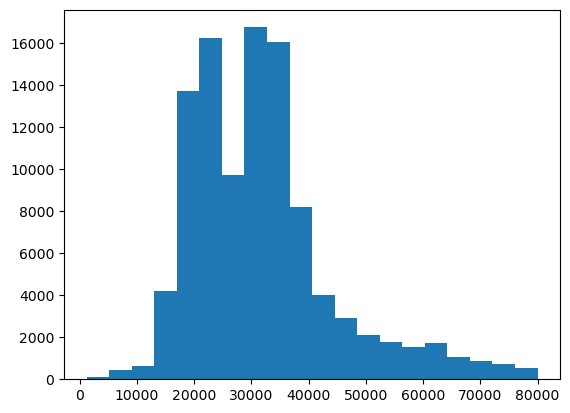

In [99]:
take1 = list(df_no1.values()) #매출액만 가져오고
take1=sorted(take1) #이를 정렬

remove_set = {0}
take1 = [i for i in take1 if i not in remove_set] #매출액중 주문취소와 같은 매출0인 요소를 제거

take2 = [x for x in take1 if x< 80000] #극단적 최대값 제거 
print(len(take1), len(take2)) #약 3000개가 없어졌으며 이는 전체의 3퍼센트 정도 됨
plt.hist(take2, bins = 20)

### 랜덤박스 가격설정 결론
 - 시각화된 데이터를 보면 2만원초반부터 3만원 중반이 가장 많았음을 볼수있다.
 - 2만원후반대가 적은이유는 3만원을 넘을시 각 사이트에서 추가적인 해택이 있기에 그렇다고 판단할수있다.
 - 따라서 해당 가격대가 사람들이 부담없이 가장 많이 주문하는 금액임을 알수있기에 랜덤박스 가격을 <3만>으로 설정하였다. 
 - - <<< 25,000은 어떨까? 3만원에서 추가 해택이 있다면 무언가를 추가로 같이 구매할 것이라 생각이 되는데 보통 비슷한 것을 추가로 구매하지 않을까? 햇반은 기본적으로 미포함이기에 햇반을 같이 파는 방식의 복합상품을 추가적으로 구상해볼수있다.
 - 이외의 이유는 기본적으로 만원단위라고 생각을 하면 2만은 랜덤박스에 넣을수있는 제품의 종류가 매우 한정되기에 랜덤이라는 의미가 퇴색된다고 판단되며 4만이상은 한번에 지출하기 부담스러운 금액이 될 것이라 판단되기에 그 중간인 <3만>언저리가 가장 이상적인 금액이라고 생각됨

### 시각화 2 : 랜덤박스 내용물

In [139]:
#먼저 모든 컬럼을 가지고 value_count를 진행해서 간단하게 살펴보자
df2=df[['상품명','자재명','마감구분']]


for i in list(df2.columns):
    print(df2[i].value_counts())
#주문된 횟수(value_counts)가 많을수록 인기가 높다고 판단한다.

[네이버] 햇반210Gx36개                               16282
햇반 210Gx24개                                    13518
스팸클래식 200Gx10개                                 10383
[복합_마켓전략] 비비고 만두세트(왕교자4+김치왕교자4+수제고기2+진한김치2)     5877
햇반 작은공기130G x 36개                               5206
                                               ...  
행복한콩 2가지로만 국산콩 찌개용두부 180G                          1
비비고 스팸부대찌개 460g                                    1
비비고 차돌된장찌개 460g                                    1
백설 참치액 순더깔끔한맛 900Gx2개                              1
햇반컵반 BIG스팸김치덮밥 328Gx18개(1box)                      1
Name: 상품명, Length: 1736, dtype: int64
햇반210G(36입)NEW/상온          15497
햇반210G*24(1입)/상온           13544
스팸 클래식 200G/상온             10454
햇반작은공기130G/상온               5224
비비고/사골곰탕 500G_18입/상온        4104
                           ...  
B)크레잇/뉴알떡스테이크1.4KG/냉동          1
주부초밥왕/새콤달콤 꼬마 447.6G/냉장        1
산들애/처음부터가쓰오육수525G/상온           1
CJ 다진마늘 150G(OEM)/냉장           1
다시다 프리미엄골드 한우 60G/상온           1
Name: 자재명, Lengt

In [113]:
#풀필먼트(상온), 가장 많음, 인기도
df2[df2['마감구분'] == '풀필먼트(상온)']['자재명'].value_counts()
#우선 햇반이 대다수를 차지함,그렇다면 햇반을 제외하고 나머지는 어떨까

햇반210G*24(1입)/상온            13383
햇반210G(36입)NEW/상온           11652
햇반작은공기130G/상온                5204
햇반큰공기300G/상온                 2505
햇반/205G*36EA(1입)_EBIZ/상온     2315
                            ...  
비비고/단호박죽 280G/상온               11
비비고/진국육수 멸치해물 500G/상온           6
스팸L200G*3_미드팩_NC/번들/상온          5
비비고/진국육수 소고기 500G/상온            3
햇반흑미밥210g*3EA                   2
Name: 자재명, Length: 118, dtype: int64

In [138]:
df2_1 = df2[df2['마감구분'] == '풀필먼트(상온)']['자재명'] 
df2_1[df2_1.str.contains('햇반') == False].value_counts().head(20)
#국류(곰탕,미역국,육개장)와 스팸이 햇반의 뒤를 이어 대다수를 차지

비비고/사골곰탕 500G_18입/상온        1983
비비고/미역국 500G_18입/상온         1446
스팸 클래식 200G/상온              1410
하얀설탕15kg                     855
스팸25%라이트200G/상온              783
비비고/육개장 500G_18입/상온          560
하얀설탕3KG_6개입/상온               509
쇠고기다시다 1kg                   493
맛밤80G (36개입)/상온              465
솥반 불고기버섯영양밥 200G/상온          313
맥스봉치즈1.08KG(27G*40개)         301
비비고/돼지고기김치찌개 460G_18입/상온     301
비비고/한우사골곰탕500G/상온            290
비비고/갈비탕 400G_18입/상온          236
비비고/미역국 300G_EBIZ/상온         233
씨제이/명가 파래김4G*16EA/상온         220
포도씨유 900ML(20년리뉴얼)/상온        213
스팸25%라이트340G/상온              204
B)태양초고추장14kgCAN/상온           197
비비고/두부김치찌개 460G(16입)/상온      197
Name: 자재명, dtype: int64

In [134]:
df2_2=df2[df2['마감구분'] == '상온']['자재명']
df2_2[df2_2.str.contains('햇반') == False].value_counts().head(20)
#위의 풀필먼트(상온)과 비슷한 결과를 보임, 다만 스팹이 압도적으로 많음

스팸 클래식 200G/상온            9044
비비고/사골곰탕 500G_18입/상온      2121
갈색설탕15KG/상온                457
밥이랑야채27g                   436
하얀자일로스설탕5KG(23년)/상온        400
병아리콩 그레인보울 160G/상온         381
할라피뇨 그레인보울 160G/상온         322
스팸클래식340g                  311
비비고/차돌된장찌개 460G_18입/상온     298
비비고/사골곰탕300G_26입/상온        288
하얀자일로스설탕5KG/상온             287
비비고/육개장 500G_18입/상온        278
냉면다시다300G                  266
밸런스밀 쉐이크 귀리 50G/상온         228
우리쌀태양초고추장2KG/PP/상온         228
비비고/차돌육개장500G/상온           227
스팸25%라이트200G/상온            221
갈색설탕3KG(6개입)/상온            211
B)쇠고기다시다25kg               200
비비고/육개장300G_온라인/상온         198
Name: 자재명, dtype: int64

In [135]:
df2_3 =df2[df2['마감구분'] == '냉동']['자재명']
df2_3[df2_3.str.contains('햇반') == False].value_counts().head(20)
#우선 고메의 치킨,피자, 짬뽕, 핫도그, 탕수육 / 비비고 만두,갈비탕,동그랑떙 순으로 인기가 높음

고메 소바바치킨 소이허니 순살 375G/냉동     938
고메 소바바치킨 소이허니 윙 300G/냉동      919
고메 소바바치킨 소이허니 봉 300G/냉동      906
CJ비비고왕교자1.05KG/냉동            751
비비고/왕교자315G_R/냉동             654
비비고/매운왕교자 315G/냉동            603
비비고/수제한섬만두 320G_R/냉동         578
CJ비비고김치왕교자1.05KG/냉동          518
비비고/본갈비탕 700G/냉동             509
고메 스윗치즈 피자 325G/냉동           480
고메 토마토치즈 피자 345G/냉동          476
비비고/수제진한김치만두400G*2_인천/냉동     441
고메 갈릭치즈 피자 325G/냉동           367
비비고/수제진한고기만두400G*2_R/번들/냉    270
고메/(리뉴얼)중화짬뽕/652G/냉동         156
비비고/도톰동그랑땡 425G*2_BC/냉동      127
고메/오리지널 핫도그 400G/냉동          120
CJ/고메/(리뉴얼)중화짜장/760G/냉동      119
고메 바삭쫄깃한 탕수육 450G/냉동         119
고메 클래식 콤비네이션 피자 405G/냉동      111
Name: 자재명, dtype: int64

In [136]:
df2_4=df2[df2['마감구분'] == '풀필먼트(저온)']['자재명']
df2_4[df2_4.str.contains('햇반') == False].value_counts().head(20)
#위의 냉동과 비슷하게 비비고 만두가 대다수의 상위권을 차지
#만두 이후에 고등어, 고메 핫도그,짬뽕,돈카츠, 김치, 함박스테이크 순으로 진행됨

CJ비비고왕교자1.05KG/냉동            1744
비비고/김치왕교자 315G_R/냉동          1500
비비고/왕교자315G_R/냉동             1499
비비고/수제깔끔고기만두200G/냉동          1469
비비고/수제진한김치만두200G/냉동          1469
CJ비비고김치왕교자1.05KG/냉동           608
비비고/수제진한고기만두400G*2_R/번들/냉     399
비비고/순살고등어구이 60G_HS/냉동         280
고메/크리스피핫도그 400G/냉동            264
고메/(리뉴얼)중화짬뽕/652G/냉동          238
CJ/고메바삭튀겨낸통등심돈카츠450G/냉동       188
CJ비비고왕교자455G*2EA/냉동           186
CJ비비고김치왕교자420G*2EA/냉동         180
비비고/썰은배추김치1.8KG(8입)/냉장        171
고메/치즈크리스피핫도그 340G/냉동          153
비비고/총각김치 1.5KG_GGNH/냉장        139
고메함박스테이크152G(22입)/냉장          111
비비고/수제진한김치만두400G*2_인천/냉동      105
비비고/물만두 370G*2EA(인천)/냉동        97
비비고/노릇하게구운고등어구이 60G/냉동         83
Name: 자재명, dtype: int64

In [137]:
df2_5=df2[df2['마감구분'] == '냉장']['자재명']
df2_5[df2_5.str.contains('햇반') == False].value_counts().head(20)
#기타 생선류와 함박스테이크, 소세지, 양념류, 김치순으로 인기도가 높음

비비고/고등어구이 60G/냉장            342
고메함박스테이크152G(22입)/냉장        322
비비고/삼치구이 60G/냉장             318
비비고/순살고등어구이 60G/냉장          307
비비고/가자미구이 70G/냉장            261
더건강한그릴후랑크300G*2/냉장          197
다담/정통된장찌개양념 140G/24입/냉장     185
백설/백설햄스빌두툼한굿베이컨340G/냉장      177
비비고/순살삼치구이 60G/냉장           177
다담/순두부찌개양념 140G/24입/냉장      152
고메토마토미트볼147G(22입)/냉장        151
비비고/썰은배추김치1.8KG(8입)/냉장      145
더건강한 닭가슴살 직화 통살구이100G/냉장    129
비비고/백김치 500G_GGNH/냉장        107
다담 된장찌개양념 530G/냉장           105
(남원)동치미물냉면908G(2인분)/냉장      103
비비고/묵은지 1.5KG(4입)/냉장        102
비비고/ 열무김치 1.5KG_GGNH/냉장      98
동치미냉면육수300G_남원/냉장            95
(남원)밀당의고수쫄면2인/냉장             89
Name: 자재명, dtype: int64

In [118]:
df2[df2['마감구분'] == '김치']['자재명'].value_counts()

비비고/포기배추김치 10KG(직택배)/냉장    1018
Name: 자재명, dtype: int64

### 랜덤박스 내용물 결론
 - 

### 시각화 3 : 랜덤박스 판매일

In [144]:
#기본적으로 사람들이 많이 구매하는 날에 프로모션을 진행한다면 사람들이 더 많이 구매를 할것이다.
#따라서 어느날에 매출이 많은지 알아보자
df3 = df[['주문일', '매출액']]

In [145]:
df3

,주문일,매출액
0,20230506,26900
1,20230506,33800
2,20230506,14900
3,20230506,16900
4,20230506,35120
...,...,...
148983,20230528,3841
148984,20230528,11460
148985,20230528,21510
148986,20230528,21800


In [150]:
#일별 매출액을 알아보기위해 주문일을 기준으로 groupby진행하고 매출액을 기준으로 재정렬
df3_1=pd.DataFrame(df3.groupby('주문일')['매출액'].sum()).sort_values(by ='매출액', ascending = False)

In [169]:
df3_1.head(6)
#29(월),17(수),30(화),22(월),23(화),31(수)순으로 매출액이 많으며
#다른날과 차이가 많이 나는 날은 29,17,30일이다. 

,매출액
주문일,
20230529,283950960
20230517,265962135
20230530,184307360
20230522,143794940
20230523,141734300
20230531,136028790


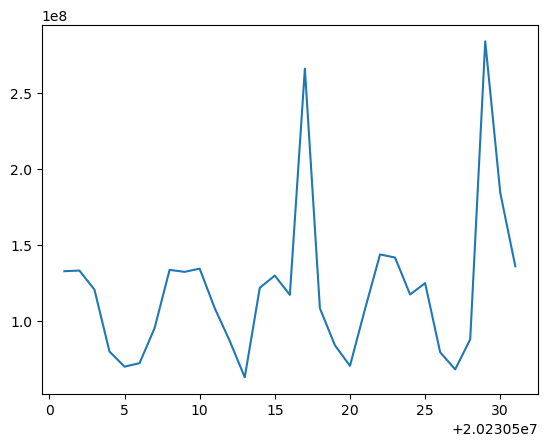

In [168]:
df3_2 = df3_1.sort_index(ascending=False) #매출액이 아닌 날짜순으로 재정렬

x = df3_2.index # x축(시간 정보)
y = df3_2 # y축 값(데이터 개수)

plt.plot(df3_2) # 그래프 시각화
plt.show()

### 랜덤박스 판매일 결론
 - 매출액이 많은 날들의 공통점으로 해당 월의 중후반이라는 점과 해당 주의 초반이라는 것이다.
 - 따라서 매달 마지막주 월,화,수 요일에 판매를 하기로 결정하였다.

In [170]:
take2

[1210,
 1400,
 2380,
 2420,
 2420,
 2420,
 2420,
 2420,
 2420,
 2500,
 2860,
 3100,
 3300,
 3490,
 3500,
 3630,
 3630,
 3630,
 3880,
 3900,
 3900,
 3980,
 3980,
 4350,
 4350,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4380,
 4400,
 4480,
 4480,
 4480,
 4480,
 4480,
 4480,
 4480,
 4480,
 4480,
 4480,
 4480,
 4480,
 4680,
 4680,
 4680,
 4780,
 4780,
 4780,
 4780,
 4950,
 4960,
 4960,
 4960,
 4960,
 4960,
 4960,
 4960,
 4960,
 4960,
 4960,
 4960,
 4960,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 4980,
 5160,
 5220,
 5280,
 5430,
 5430,
 5430,
 5430,
 5430,
 5430,
 5430,
 5430,
 5430,
 5430,
 5430,
 5430,
 5430,
 5430,
 5430,

{'whiskers': [<matplotlib.lines.Line2D at 0x2a377418790>,
 'caps': [<matplotlib.lines.Line2D at 0x2a377419810>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a377335910>],
 'medians': [<matplotlib.lines.Line2D at 0x2a37741a990>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a375fe5c10>],
 'means': []}

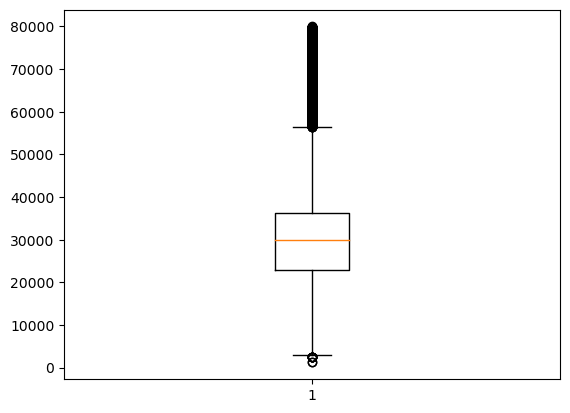

In [171]:
plt.boxplot(take2)

### 시각화 4 : 상품군에 따른 선호도 분석

 - 랜덤박스는 간식용, 밥반찬용, 끼니용 3가지로 구분되며 이에 따라 상품도 구분해야한다
 - 주문량과 매출액이 많을수록 선호도가 높은 상품이다
 - 낱개 구매횟수와 대량 구매횟수를 비교하여 대량 구매횟수가 높을수록 선호도가 높은 상품이다

In [181]:
df4 = df[df['초기자재수량']==df['주문수량']][['매출액','자재명']] #주문취소가 아닌 인덱스만 남기고 매출액과 자재명을 한정

In [194]:
df4['자재명'].value_counts().head(60) #전체 상품의 대략적인 종류와 구매횟수 파악

햇반210G(36입)NEW/상온              15422
햇반210G*24(1입)/상온               13523
스팸 클래식 200G/상온                 10441
햇반작은공기130G/상온                   5197
비비고/사골곰탕 500G_18입/상온            4091
햇반 발아현미밥 210G 낱개(36입)/상온        3598
햇반 흑미밥 210G(36입)/상온             2666
햇반큰공기300G/상온                    2500
CJ비비고왕교자1.05KG/냉동               2482
햇반/205G*36EA(1입)_EBIZ/상온        2303
비비고/왕교자315G_R/냉동                2150
햇반 발아현미밥 작은공기 130G*3번들/상온       2086
햇반 매일잡곡밥 210G(36입)/상온           2078
햇반 100%현미로 지은 밥 130G_GHP/상온     1797
비비고/미역국 500G_18입/상온             1555
비비고/김치왕교자 315G_R/냉동             1546
비비고/수제깔끔고기만두200G/냉동             1526
비비고/수제진한김치만두200G/냉동             1481
햇반 흑미밥 작은공기 130G*3번들/상온         1406
햇반 현미귀리곤약밥 150G*12/번들/상온        1339
CJ비비고김치왕교자1.05KG/냉동             1120
비비고/포기배추김치 10KG(직택배)/냉장         1013
스팸25%라이트200G/상온                 1004
햇반/햇반210G(48입)_CVS/상온            991
고메 소바바치킨 소이허니 순살 375G/냉동         936
고메 소바바치킨 소이허니 윙 300G/냉동          918
햇반/솥반 꿀약밥 210G                   912
고

In [260]:
df4_11=df4[df4['자재명'].str.contains('햇반')] #햇반 추출
df4_12=df4_11[df4_11['자재명'].str.contains('컵반')] 
#햇반브랜드의 컵반
#컵반은 끼니용
df4_12.value_counts().head(50) 

매출액    자재명                     
6975   햇반/컵반BIG치킨마요덮밥313G/상온       170
       햇반/컵반BIG스팸마요덮밥307G/상온       170
22800  햇반/컵반 한끼뚝딱세트A/혼합            113
6277   햇반/컵반BIG치킨마요덮밥313G/상온        99
       햇반/컵반BIG스팸마요덮밥307G/상온        99
6975   햇반/컵반BIG스팸김치덮밥328G/상온        95
       햇반/컵반BIG김치날치알밥263G/상온        95
5780   햇반/컵반 스팸김치덮밥251G(18입)/상온     83
       햇반/컵반스팸마요덮밥219G/상온           83
       햇반/컵반철판제육덮밥256G(칼로스)/상온      83
       햇반/컵반강된장보리비빔밥280G(칼로스)/상     83
       햇반/컵반 치킨마요덮밥 233G/상온         83
6975   햇반/컵반BIG스팸김치덮밥328G(침착맨)      75
       햇반/컵반BIG김치날치알밥263G(침착맨)      75
6277   햇반/컵반BIG스팸김치덮밥328G/상온        73
6279   햇반/컵반BIG김치날치알밥263G/상온        73
6725   햇반/컵반BIG스팸마요덮밥307G/상온        58
       햇반/컵반BIG치킨마요덮밥313G/상온        58
5202   햇반/컵반스팸마요덮밥219G/상온           55
       햇반/컵반철판제육덮밥256G(칼로스)/상온      55
       햇반/컵반강된장보리비빔밥280G(칼로스)/상     55
       햇반/컵반 스팸김치덮밥251G(18입)/상온     55
       햇반/컵반 치킨마요덮밥 233G/상온         55
21800  햇반/컵반 한끼뚝딱세트A/혼합             50
5779   햇반/컵반BIG김치날치알밥263G/상온    

In [261]:
df4_21=df4[df4['자재명'].str.contains('비비고')] #비비고 추출
df4_22=df4_21[df4_21['자재명'].str.contains('만두|교자')]
#비비고브랜드의 만두
#만두은 간식용
df4_22.value_counts().head(50) 

매출액    자재명                      
27490  CJ비비고왕교자1.05KG/냉동            433
13207  CJ비비고김치왕교자1.05KG/냉동          402
15293  CJ비비고왕교자1.05KG/냉동            402
10781  비비고/왕교자315G_R/냉동             318
5416   비비고/수제깔끔고기만두200G/냉동          318
       비비고/수제진한김치만두200G/냉동          318
11287  비비고/김치왕교자 315G_R/냉동          318
9703   비비고/왕교자315G_R/냉동             306
4874   비비고/수제깔끔고기만두200G/냉동          306
       비비고/수제진한김치만두200G/냉동          306
10159  비비고/김치왕교자 315G_R/냉동          305
15524  CJ비비고김치왕교자1.05KG/냉동          301
17976  CJ비비고왕교자1.05KG/냉동            301
17049  비비고/왕교자315G_R/냉동             297
5284   비비고/매운왕교자 315G/냉동            297
7567   비비고/수제한섬만두 320G_R/냉동         297
26490  CJ비비고왕교자1.05KG/냉동            245
9472   비비고/김치왕교자 315G_R/냉동          185
4545   비비고/수제깔끔고기만두200G/냉동          185
       비비고/수제진한김치만두200G/냉동          185
9048   비비고/왕교자315G_R/냉동             185
24740  CJ비비고왕교자1.05KG/냉동            174
10602  비비고/김치왕교자 315G_R/냉동          148
10126  비비고/왕교자315G_R/냉동             148
5086   

In [262]:
df4_31=df4[df4['자재명'].str.contains('비비고')] #비비고 추출
df4_32=df4_31[df4_31['자재명'].str.contains('국|탕|찌개')] 
#비비고브랜드의 국류
#국류는 밥반찬용
df4_32.value_counts().head(50) 

매출액    자재명                     
14300  비비고/사골곰탕 500G_18입/상온        1737
19300  비비고/사골곰탕 500G_18입/상온         979
17900  비비고/미역국 500G_18입/상온          594
17370  비비고/사골곰탕 500G_18입/상온         306
17910  비비고/사골곰탕 500G_18입/상온         201
20900  비비고/사골곰탕300G_26입/상온          169
17000  비비고/미역국 300G_EBIZ/상온         162
16100  비비고/미역국 500G_18입/상온           94
35910  비비고/본갈비탕 700G/냉동              76
19900  비비고/사골곰탕 500G_18입/상온          71
16110  비비고/미역국 500G_18입/상온           64
46070  비비고/미역국 500G_18입/상온           61
18800  비비고/한우사골곰탕500G/상온             58
17900  비비고/사골곰탕 500G_18입/상온          55
19900  비비고/사골곰탕300G_26입/상온           55
29300  비비고/본갈비탕 700G/냉동              53
16800  비비고/사골곰탕 500G_18입/상온          39
32980  비비고/갈비탕 400G_18입/상온           39
13950  비비고/돼지고기김치찌개 460G_18입/상온      39
       비비고/차돌된장찌개 460G_18입/상온        39
17000  비비고/미역국 500G_18입/상온           39
11071  비비고/미역국 500G_18입/상온           38
17360  비비고/사골곰탕 500G_18입/상온          38
5040   비비고/사골곰탕 500G_18입/상온          38
24830  비

In [263]:
df4_41=df4[df4['자재명'].str.contains('비비고')] #비비고 추출
df4_42=df4_41[df4_41['자재명'].str.contains('죽')]
#비비고브랜드의 죽류
#죽류는 끼니용
df4_42.value_counts().head(50) 

매출액    자재명             
12520  비비고/단호박죽 280G/상온    4
13920  비비고/단호박죽 280G/상온    4
27840  비비고/단호박죽 280G/상온    2
24590  비비고/단호박죽 280G/상온    1
dtype: int64

In [264]:
df4_51=df4[df4['자재명'].str.contains('햇반/쿡반')] #햇반 추출
df4_52=df4_51[df4_51['자재명'].str.contains('밥')]
#햇반&비비고(햇반쿡반)브랜드의 주먹밥, 비빔밥, 볶음밥류
#주먹밥, 비빔밥, 볶음밥류는 끼니용
df4_52.value_counts().head(50) 

매출액    자재명                      
10846  햇반/쿡반 스팸김치주먹밥 500G/냉동        175
       햇반/쿡반 참치마요주먹밥 500G/냉동        175
10206  햇반/쿡반 스팸김치주먹밥 500G/냉동         74
       햇반/쿡반 참치마요주먹밥 500G/냉동         74
5423   햇반/쿡반 불닭마요주먹밥 500G/냉동         45
9762   햇반/쿡반 스팸김치주먹밥 500G/냉동         44
       햇반/쿡반 참치마요주먹밥 500G/냉동         44
4881   햇반/쿡반 불닭마요주먹밥 500G/냉동         35
9887   햇반/쿡반 참치마요주먹밥 500G/냉동         35
       햇반/쿡반 스팸김치주먹밥 500G/냉동         35
5103   햇반/쿡반 불닭마요주먹밥 500G/냉동         33
9247   햇반/쿡반 참치마요주먹밥 500G/냉동         32
       햇반/쿡반 스팸김치주먹밥 500G/냉동         32
10526  햇반/쿡반 참치마요주먹밥 500G/냉동         25
       햇반/쿡반 스팸김치주먹밥 500G/냉동         25
11300  햇반/쿡반 스팸김치주먹밥 500G/냉동         24
       햇반/쿡반 참치마요주먹밥 500G/냉동         24
5650   햇반/쿡반 불닭마요주먹밥 500G/냉동         22
8080   햇반/쿡반 스팸김치주먹밥 500G/냉동         15
20940  햇반/쿡반 불닭마요주먹밥 500G/냉동         10
5263   햇반/쿡반 불닭마요주먹밥 500G/냉동          9
7270   햇반/쿡반 스팸김치주먹밥 500G/냉동          9
19940  햇반/쿡반 불닭마요주먹밥 500G/냉동          9
9765   햇반/쿡반 참치마요주먹밥 500G/냉동          9
       

In [265]:
df4_61=df4[df4['자재명'].str.contains('비비고')] #비비고 추출
df4_62=df4_61[df4_61['자재명'].str.contains('칼국수|잡채|면')] 
#비비고브랜드의 면류(칼국수, 잡채)
#면류는 끼니용
df4_62.value_counts().head(50) 

매출액    자재명                    
23900  비비고/시원바지락칼국수642G/2인분/냉동    35
22900  비비고/시원바지락칼국수642G/2인분/냉동     8
18840  비비고/진한교자칼국수630G/2인분/냉동      8
23940  비비고/진한교자칼국수630G/2인분/냉동      6
4980   비비고/잔칫집모둠잡채322G(1팩)/냉동      5
9756   비비고/(리뉴얼)잔칫집모둠잡채644G/냉동     4
21500  비비고/시원바지락칼국수642G/2인분/냉동     4
20940  비비고/진한교자칼국수630G/2인분/냉동      4
9960   비비고/잔칫집모둠잡채322G(1팩)/냉동      3
8480   비비고/진한교자칼국수630G/2인분/냉동      3
       비비고/얼큰버섯칼국수632G/2인분/냉동      3
19700  비비고/얼큰버섯칼국수632G/2인분/냉동      3
7630   비비고/얼큰버섯칼국수632G/2인분/냉동      3
22940  비비고/(리뉴얼)잔칫집모둠잡채644G/냉동     3
47800  비비고/시원바지락칼국수642G/2인분/냉동     3
14940  비비고/잔칫집모둠잡채322G(1팩)/냉동      2
16960  비비고/시원바지락칼국수642G/2인분/냉동     2
14765  비비고/(리뉴얼)잔칫집모둠잡채644G/냉동     2
15960  비비고/(리뉴얼)버섯잡채590G/냉동        2
9716   비비고/(리뉴얼)잔칫집모둠잡채644G/냉동     2
8668   비비고/시원바지락칼국수642G/2인분/냉동     2
22940  비비고/진한교자칼국수630G/2인분/냉동      2
8630   비비고/시원바지락칼국수642G/2인분/냉동     2
8594   비비고/시원바지락칼국수642G/2인분/냉동     2
14768  비비고/(리뉴얼)잔칫집모둠잡채644G/냉동     2
8480   비비고/시원바지락칼국수642G/2인분/냉동     2
18840  

In [266]:
df4_71=df4[df4['자재명'].str.contains('고메')] #고메 추출
df4_72=df4_71[df4_71['자재명'].str.contains('치킨|봉|윙|너겟')]
#고메브랜드의 치킨류
#치킨류는 간식용
df4_72.value_counts().head(50) 

매출액    자재명                     
20466  고메 소바바치킨 소이허니 순살 375G/냉동    252
6822   고메 소바바치킨 소이허니 윙 300G/냉동     242
       고메 소바바치킨 소이허니 봉 300G/냉동     242
15950  고메 소바바치킨 소이허니 순살 375G/냉동     94
14950  고메 소바바치킨 소이허니 순살 375G/냉동     93
7475   고메 소바바치킨 소이허니 봉 300G/냉동      81
       고메 소바바치킨 소이허니 윙 300G/냉동      81
7975   고메 소바바치킨 소이허니 봉 300G/냉동      75
       고메 소바바치킨 소이허니 윙 300G/냉동      75
7180   고메 소바바치킨 소이허니 봉 300G/냉동      55
       고메 소바바치킨 소이허니 윙 300G/냉동      55
21540  고메 소바바치킨 소이허니 순살 375G/냉동     53
14355  고메 소바바치킨 소이허니 순살 375G/냉동     41
14950  고메 소바바치킨 소이허니 봉 300G/냉동      38
26940  고메치킨 후라이드 550G/냉동            36
14950  고메 소바바치킨 소이허니 윙 300G/냉동      36
15950  고메 소바바치킨 소이허니 봉 300G/냉동      35
7178   고메 소바바치킨 소이허니 봉 300G/냉동      32
7177   고메 소바바치킨 소이허니 윙 300G/냉동      32
14355  고메 소바바치킨 소이허니 봉 300G/냉동      32
22740  고메 소바바치킨 소이허니 순살 375G/냉동     30
7580   고메 소바바치킨 소이허니 윙 300G/냉동      29
       고메 소바바치킨 소이허니 봉 300G/냉동      29
15950  고메 소바바치킨 소이허니 윙 300G/냉동      28
14355  고메 소바바치킨 소이허니 윙 300G/냉동  

In [267]:
df4_81=df4[df4['자재명'].str.contains('고메')] #고메 추출
df4_82=df4_81[df4_81['자재명'].str.contains('피자')]
#고메브랜드의 피자류
#피자류는 간식용
df4_82.value_counts().head(50) 

매출액    자재명                     
8988   고메 스윗치즈 피자 325G/냉동          171
       고메 토마토치즈 피자 345G/냉동         171
11994  고메 갈릭치즈 피자 325G/냉동          171
11594  고메 갈릭치즈 피자 325G/냉동           70
8688   고메 스윗치즈 피자 325G/냉동           70
       고메 토마토치즈 피자 345G/냉동          70
8088   고메 스윗치즈 피자 325G/냉동           55
       고메 토마토치즈 피자 345G/냉동          55
10794  고메 갈릭치즈 피자 325G/냉동           55
14985  고메 토마토치즈 피자 345G/냉동          38
       고메 스윗치즈 피자 325G/냉동           38
29970  고메 스윗치즈 피자 325G/냉동           21
       고메 토마토치즈 피자 345G/냉동          16
4880   고메 클래식 콤비네이션 피자 405G/냉동      16
10798  고메 갈릭치즈 피자 325G/냉동           15
8091   고메 토마토치즈 피자 345G/냉동          15
       고메 스윗치즈 피자 325G/냉동           15
5430   고메 클래식 콤비네이션 피자 405G/냉동      13
29970  고메 갈릭치즈 피자 325G/냉동            9
9989   고메 스윗치즈 피자 325G/냉동            9
9990   고메 토마토치즈 피자 345G/냉동           9
19980  고메 스윗치즈 피자 325G/냉동            9
19981  고메 토마토치즈 피자 345G/냉동           9
6399   고메 싱글피자 허니베이컨체다 135G/냉동       8
6402   고메 싱글피자 케이준프라이즈 145G/냉동  

In [268]:
df4_91=df4[df4['자재명'].str.contains('고메')] #고메 추출
df4_92=df4_91[df4_91['자재명'].str.contains('돈까스|돈카츠|함박')]
#고메브랜드의 일식류(함박스테이크, 돈카츠)
#일식류는 밥반찬용
df4_92.value_counts().head(50) 

매출액    자재명                     
19900  고메함박스테이크152G(22입)/냉장        67
26800  고메함박스테이크152G(22입)/냉장        52
25980  CJ/고메바삭튀겨낸통등심돈카츠450G/냉동     43
9422   고메함박스테이크152G(22입)/냉장        39
24390  고메치즈함박스테이크152G/냉장           39
24120  고메함박스테이크152G(22입)/냉장        31
23380  CJ/고메바삭튀겨낸통등심돈카츠450G/냉동     29
24980  CJ/고메바삭튀겨낸통등심돈카츠450G/냉동     25
17910  고메함박스테이크152G(22입)/냉장        21
26940  CJ/고메바삭튀겨낸통등심돈카츠450G/냉동     15
25800  고메함박스테이크152G(22입)/냉장        15
17900  고메함박스테이크152G(22입)/냉장        15
8480   CJ제일제당 고메함박스테이크 540G/냉동     13
26610  CJ/고메바삭튀겨낸모짜렐라돈카츠450G/냉동    13
18900  고메함박스테이크152G(22입)/냉장        12
7630   CJ제일제당 고메함박스테이크 540G/냉동      9
23390  CJ/고메바삭튀겨낸통등심돈카츠450G/냉동      9
24110  고메함박스테이크152G(22입)/냉장         9
8480   고메함박스테이크152G(22입)/냉장         8
24680  CJ/고메바삭튀겨낸통등심돈카츠450G/냉동      8
11420  고메함박스테이크152G(22입)/냉장         7
26090  CJ제일제당 고메함박스테이크 540G/냉동      7
23370  CJ/고메바삭튀겨낸통등심돈카츠450G/냉동      6
8475   고메함박스테이크152G(22입)/냉장         6
24670  CJ/고메바삭튀겨낸통등심돈카츠450G/냉동      6
23950  CJ/고메바삭튀겨낸모

In [269]:
df4_101=df4[df4['자재명'].str.contains('고메')] #고메 추출
df4_102=df4_101[df4_101['자재명'].str.contains('핫도그')]
#고메브랜드의 핫도그류
#핫도그류는 간식용
df4_102.value_counts().head(50) 

매출액    자재명                    
27920  고메/크리스피핫도그 400G/냉동         96
       고메/치즈크리스피핫도그 340G/냉동       44
15940  고메/오리지널 핫도그 400G/냉동        42
25120  고메/크리스피핫도그 400G/냉동         36
26940  고메포테이토치즈 핫도그400G/냉동        29
26920  고메/크리스피핫도그 400G/냉동         24
23940  고메/통모짜핫도그 340G/냉동          19
29580  고메/치즈크리스피핫도그 340G/냉동       18
26940  고메빅크리스피핫도그520G/냉동          15
17800  고메/크리스피핫도그 400G/냉동         13
25120  고메/치즈크리스피핫도그 340G/냉동       13
26920  고메/치즈크리스피핫도그 340G/냉동       13
24240  고메포테이토치즈 핫도그400G/냉동        12
25130  고메/치즈크리스피핫도그 340G/냉동       12
8480   고메빅크리스피핫도그520G/냉동          10
25130  고메/크리스피핫도그 400G/냉동         10
17800  고메포테이토치즈 핫도그400G/냉동        10
9966   고메/크리스피핫도그 400G/냉동          9
26620  고메/치즈크리스피핫도그 340G/냉동        9
26520  고메/크리스피핫도그 400G/냉동          9
31880  고메/오리지널 핫도그 400G/냉동         9
24120  고메/크리스피핫도그 400G/냉동          9
7980   고메/오리지널 핫도그 400G/냉동         8
9966   고메/치즈크리스피핫도그 340G/냉동        7
6280   고메/크리스피핫도그 400G/냉동          7
35920  고메빅크리스피핫도그520G/냉동           7
16010  

In [270]:
df4_111=df4[df4['자재명'].str.contains('스팸')] #고메 추출
df4_112=df4_111[~df4_111['자재명'].str.contains('햇반|비비고|건강한')]
#스팸브랜드의 스팸류
#스팸류는 밥반찬용
df4_112.value_counts().head(50) 

매출액    자재명            
19900  스팸 클래식 200G/상온     6557
24900  스팸 클래식 200G/상온      683
17900  스팸 클래식 200G/상온      395
27900  스팸 클래식 200G/상온      293
29900  스팸 클래식 200G/상온      279
18410  스팸 클래식 200G/상온      252
18900  스팸 클래식 200G/상온      201
23900  스팸 클래식 200G/상온      178
24710  스팸25%라이트200G/상온     127
28900  스팸 클래식 200G/상온      113
34940  스팸클래식340g           109
26900  스팸 클래식 200G/상온      108
26910  스팸 클래식 200G/상온      105
19950  스팸 클래식 200G/상온      103
49490  스팸25%라이트200G/상온     101
20900  스팸 클래식 200G/상온       99
41220  스팸 클래식 200G/상온       92
18810  스팸 클래식 200G/상온       84
22410  스팸 클래식 200G/상온       73
25110  스팸 클래식 200G/상온       65
44820  스팸 클래식 200G/상온       62
24860  스팸25%라이트200G/상온      61
23570  스팸25%라이트200G/상온      58
36350  스팸25%라이트340G/상온      50
52240  스팸25%라이트200G/상온      43
23710  스팸25%라이트200G/상온      40
49800  스팸 클래식 200G/상온       40
32940  스팸클래식340g            40
18800  스팸 클래식 200G/상온       36
21520  스팸클래식340g            36
25240  스팸25%라이트200G/상온      33
22400  스팸 클래식 20

In [272]:
df4_121=df4[df4['자재명'].str.contains('건강한')] #고메 추출
df4_122=df4_121[df4_121['자재명'].str.contains('닭|후랑크|비엔나|베이컨|소시지')] 
#the건강한 브랜드의 가공육류
#가공육류류는 밥반찬용
df4_122.value_counts().head(50) 

매출액    자재명                     
6280   더건강한그릴후랑크300G*2/냉장          61
19980  더건강한 닭가슴살 꼬지 청양 80G/냉장      16
26800  더건강한 닭가슴살 직화 스테이크100G/냉장    16
39800  더건강한닭가슴살 큐브톡톡 ALL 96G/냉장    13
6630   더건강한그릴후랑크300G*2/냉장          11
9100   더건강한 닭가슴살 직화 통살구이100G/냉장    11
27920  더건강한그릴후랑크300G*2/냉장           9
16664  더건강한 닭가슴살 통살 페퍼 100G/냉장      8
15406  더건강한 닭가슴살 직화 통살구이100G/냉장     8
26800  더건강한 닭가슴살 직화 통살구이100G/냉장     8
20940  더건강한그릴후랑크300G*2/냉장           8
12050  더건강한 닭가슴살 직화 통살구이100G/냉장     7
6980   더건강한그릴후랑크300G*2/냉장           6
26920  더건강한그릴후랑크300G*2/냉장           5
64800  더건강한그릴후랑크300G*2/냉장           5
25800  더건강한 닭가슴살 직화 스테이크100G/냉장     5
5340   더건강한후랑크150g                  4
37690  더건강한그릴후랑크300G*2/냉장           4
53600  더건강한 닭가슴살 직화 스테이크100G/냉장     4
5081   더건강한그릴비엔나200G*2/냉장           4
19800  더건강한후랑크150g                  4
16669  더건강한 닭가슴살 통살 페퍼 100G/냉장      4
25800  더건강한 닭가슴살 직화 통살구이100G/냉장     4
15920  더건강한 닭가슴살 통살 페퍼 100G/냉장      4
15411  더건강한 닭가슴살 직화 통살구이100G/냉장     4
14720  더건강한 닭가슴살 직

In [279]:
print(df4_12['매출액'].sum()) #4, 컵반
print(df4_22['매출액'].sum()) #3, 만두
print(df4_32['매출액'].sum()) #2, 국
print(df4_42['매출액'].sum()) #12, 죽
print(df4_52['매출액'].sum()) #9, 주먹밥,볶음밥
print(df4_62['매출액'].sum()) #10, 면류
print(df4_72['매출액'].sum()) #5, 치킨
print(df4_82['매출액'].sum()) #7, 피자
print(df4_92['매출액'].sum()) #8, 함박,돈카츠
print(df4_102['매출액'].sum()) #6 , 핫도그
print(df4_112['매출액'].sum()) #1, 스팸
print(df4_122['매출액'].sum()) #11, the건강한

69587629
177560469
236027243
186030
16584767
4310689
44620773
22766436
19911625
23050480
302915384
12353263


<BarContainer object of 12 artists>

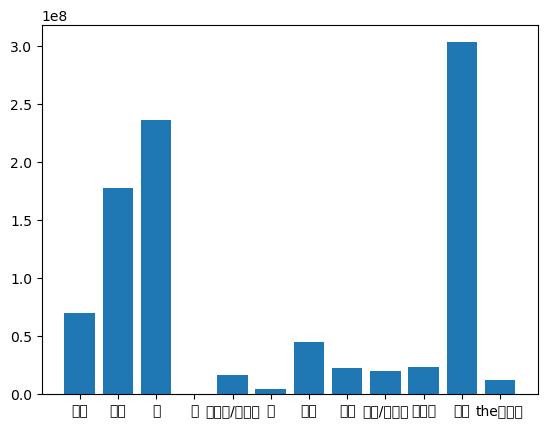

In [281]:
y = [69587629,177560469,236027243,186030,16584767,4310689,44620773,22766436,19911625,23050480,302915384,12353263]

x = ['컵반','만두','국','죽','주먹밥/볶음밥','면','치킨','피자','함박/돈카츠','핫도그','스팸','the건강한']

plt.bar(x,y)